In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xml.etree import ElementTree as ET

plt.style.use('ggplot')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the dataset

In [4]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

/home/trent/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
sales_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Sales_Transfers', header=3, parse_cols=[1,2,3,5])
sales_dict

,Field Name,Example,Column Type,Description
0,PIN,163752899,Text,Assessor's Property Identification Number
1,SCHEDNUM,0231416005000,Text,Assessor's Schedule Number
2,RECEPTION_NUM,2011148564,Text,Clerk & Recorder's Reception Number
3,RECEPTION_DATE,20101004,Text,Clerk & Recorder's Reception Date
4,INSTRUMENT,WD,Text,Type of Instrument
5,SALE_YEAR,2010,Text,Sale Year
6,SALE_MONTHDAY,0928,Text,Sale Month/Day
7,SALE_PRICE,199677,Text,Sale Price
8,GRANTOR,"SMITH, JOHN & JANE",Text,Person(s) relinquishing ownership
9,GRANTEE,"BROWN, JAMES",Text,Person(s) recieving ownership


## Filtering the dataset to only show single family home sales

In [69]:
single_family_home = 'SINGLE FAMILY'

df_sales = df_sales[df_sales.D_CLASS_CN == single_family_home]

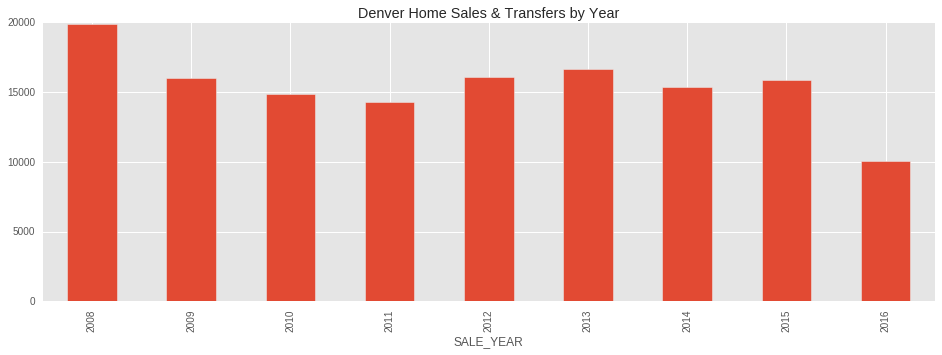

In [70]:
df_sales.groupby('SALE_YEAR').size().plot('bar', 
                                          figsize=(16, 5),
                                          title= "Denver Home Sales & Transfers by Year")

In [71]:
days = []
months = []
years = df_sales.SALE_YEAR.astype(str)
datetimes = []

for row in df_sales.SALE_MONTHDAY:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    
df_sales['date'] = years + '-' + months + '-' + days

df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%d-%m')

df_sales.index = df_sales.date

df_sales['year'] = df_sales.index.year
df_sales['month'] = df_sales.index.month
df_sales['day'] = df_sales.index.day

In [72]:
df_sales.resample('A', how='max')

/home/trent/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  if __name__ == '__main__':


,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN,date,year,month,day
date,,,,,,,,,,,,,,,,,,,,
2008-12-31,914505036000,9999999999,WD,2008,1231,20160822,21275800.000,"ZYMERI,MARIA C","ZYMERI,MARIA C & VALMIR",R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,164043195,2008-12-31,2008,12,31
2009-12-31,914505006000,9999999999,WD,2009,1231,20160902,4100000.000,"ZWICKL,DAVID",ZZ INVEST LLC,R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,164072942,2009-12-31,2009,12,31
2010-12-31,914505036000,9999999999,WD,2010,1231,20160823,17113000.000,ZZ INVEST LLC,ZZ INVEST LLC,R,52.000,119,SINGLE FAMILY,906,ZUNI PARK,164072942,2010-12-31,2010,12,31
2011-12-31,914505016000,9999999999,WD,2011,1231,20160831,5000000.000,"ZWEYGARDT,RUDY R & EDITH M","ZUSSMAN,MENACHEM T",R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,163842995,2011-12-31,2011,12,31
2012-12-31,914505001000,2016093234,WD,2012,1231,20160906,5400000.000,"ZWICKL,ADAM M &","ZWICKL,ADAM M & JAMIE A",R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,163952090,2012-12-31,2012,12,31
2013-12-31,914505034000,2016115865,WD,2013,1231,20160829,14606000.000,"ZUPKUS,ROBERT A & DONNA F",ZURTS SOLUTIONS LLC,R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,164003126,2013-12-31,2013,12,31
2014-12-31,914505034000,2016112400,WD,2014,1231,20160908,49500000.000,"ZWICKL,DAVID","ZYER,SEAN",R,33.000,119,SINGLE FAMILY,906,ZUNI PARK,164070770,2014-12-31,2014,12,31
2015-12-31,914505035000,2016091647,WD,2015,1231,20160906,11500000.000,ZZ LLC,ZZ LLC,R,52.000,119,SINGLE FAMILY,906,ZUNI PARK,164080325,2015-12-31,2015,12,31
2016-12-31,914505007000,2016122727,WD,2016,909,20160909,4500000.000,"ZWICKER,RUDI","ZYLBERBERG,JOEL L",R,56.000,119,SINGLE FAMILY,906,ZUNI PARK,164094946,2016-09-09,2016,9,31


In [7]:
df_sales.groupby('INSTRUMENT').size()

INSTRUMENT
AD        30
AF        30
BF       300
BG       385
BK         1
BS      1633
CD       266
CM         1
CS       194
DC      4364
DD      1691
DE       521
DF        27
DL       541
DN         1
DS       139
DT         1
EX         1
GR        89
LE        52
MG        23
MH         1
NC       197
OC         2
OR         1
PB        13
PC       315
PL        11
PR      7330
PS      4444
PT     16717
QC     45511
RC        69
RV         3
SC         1
SF       163
ST        42
SW     24490
TN         2
TR       782
TS        24
TT         5
WD    124411
dtype: int64

In [49]:
df_yearly_instruments = df_sales.groupby(['SALE_YEAR', 'INSTRUMENT']).size().unstack().fillna(0)
top_instruments = df_yearly_instruments.sum().sort_values(ascending=False).head().index